# <center> Named-entity recognition

#### What is Named Entity Recognition (NER)?
- NLP task to identify important named entities in the text such as :
    - People, places, organizations
    - Dates, states, works of art
    - ... and other categories!
- Can be used alongside topic identification
    - ... or on its own!
- Or answer basic natural language understanding questions such as:
    - Who? What? When? Where?

- NER can solve problems like fact extraction

NER example:

Text has been highlighted for different types of named entities that were found using the Standford NER library

<img src="https://researchkb.files.wordpress.com/2014/02/ner.png" width="800" height="400">    


#### nltk and the Stanford CoreNLP Library
The Stanford CoreNLP library:
- Integrated into Python via nltk
- Java based
- Support for NER as well as coreference and dependency trees

Example using NLTK:

In [1]:
import nltk

sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

##preprocess - tokenization
tokenized_sent = nltk.word_tokenize(sentence)
print(tokenized_sent)

['In', 'New', 'York', ',', 'I', 'like', 'to', 'ride', 'the', 'Metro', 'to', 'visit', 'MOMA', 'and', 'some', 'restaurants', 'rated', 'well', 'by', 'Ruth', 'Reichl', '.']


In [2]:
##DOWNLOAD if first time using tagger
#nltk.download('averaged_perceptron_tagger')

In [3]:
##Tag sentences for parts of speech
tagged_sent = nltk.pos_tag(tokenized_sent)
print('This add tags for proper nouns, pronouns, adjective, verbs and other part \nof speech that NLTK uses based on an english Grammar:')
##npp IS THE TAG FOR A PROPER NOUN SINGULAR
tagged_sent[:3]

This add tags for proper nouns, pronouns, adjective, verbs and other part 
of speech that NLTK uses based on an english Grammar:


[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [4]:
##DOWNLOAD if first time using CHUNKER
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [5]:
##PASS this tagged sentence into the ne_chunk (name entity chunk) function
#this returns the sentence as a tree
print('This tree has leaves and subtrees that represent more complex grammar')
print('See the identified entities like GPE, ORGANIZATION and PERSON')
print(nltk.ne_chunk(tagged_sent))

This tree has leaves and subtrees that represent more complex grammar
See the identified entities like GPE, ORGANIZATION and PERSON
(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


#### NER with NLTK example

In [6]:
##using a article which was copy on a txt file
with open('datasets/article_NER.txt','r',encoding='UTF-8') as file:
    article=file.read()
article[:500]

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.'

In [7]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)
sentences[:3]

['The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character.',
 'If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic.',
 'Uber wanted to know as much as possible about the people who use its service, and those who don’t.']

In [8]:
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
print(token_sentences[0])

['The', 'taxi-hailing', 'company', 'Uber', 'brings', 'into', 'very', 'sharp', 'focus', 'the', 'question', 'of', 'whether', 'corporations', 'can', 'be', 'said', 'to', 'have', 'a', 'moral', 'character', '.']


In [9]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
print(pos_sentences[0])

[('The', 'DT'), ('taxi-hailing', 'JJ'), ('company', 'NN'), ('Uber', 'NNP'), ('brings', 'VBZ'), ('into', 'IN'), ('very', 'RB'), ('sharp', 'JJ'), ('focus', 'VB'), ('the', 'DT'), ('question', 'NN'), ('of', 'IN'), ('whether', 'IN'), ('corporations', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('said', 'VBD'), ('to', 'TO'), ('have', 'VB'), ('a', 'DT'), ('moral', 'JJ'), ('character', 'NN'), ('.', '.')]


Note:
- The hasattr() function returns True if the specified object has the specified attribute, otherwise False

In [10]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
# Test for stems of the tree with 'NE' tags
# test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE"
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


#### CHARTING example

In [11]:
import collections
import matplotlib.pyplot as plt

In [12]:
# Create the defaultdict: ner_categories
ner_categories = collections.defaultdict(int)

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

# Create the nested for loop
#Fill up the dictionary with values for each of the keys
for sent in chunked_sentences:
    for chunk in sent:
        ##Just the tokens that have label
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1 
ner_categories

defaultdict(int, {'GPE': 2, 'PERSON': 7, 'ORGANIZATION': 1})

In [13]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
labels

['GPE', 'PERSON', 'ORGANIZATION']

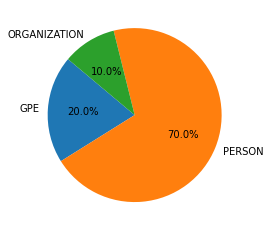

In [14]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

When using the Stanford library with NLTK, what is needed to get started?
- NLTK, the Stanford Java Libraries and some environment variables to help with integration.

# <center> Introduction to SpaCy
#### What is SpaCy?
- NLP library similar to gensim, with different implementations
- Focus on creating NLP pipelines to generate models and corpora
- Open-source, with extra libraries and tools
    - Displacy

#### Displacy entity recognition visualizer example

<img src="https://i2.wp.com/neptune.ai/wp-content/uploads/output8.png" width="800" height="400">   
    

    
#### SpaCy NER

<img src="https://miro.medium.com/max/1400/1*qQggIPMugLcy-ndJ8X_aAA.png" width="800" height="400">    

Example:
    
Install spacy on conda
>conda install -c conda-forge spacy
    
Download english model
>python -m spacy download en_core_web_sm

In [15]:
import spacy

In [16]:
##load train vectors into object nlp (works similar to Gensim dictionary and corpus)
nlp = spacy.load('en_core_web_sm')
##Entity recognizer object for pipeline module
nlp.entity

In [17]:
## load new document by passing string in new var
doc = nlp("""Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.""")
##when the document is loaded, the named entities are stored as a document attribute called ents
doc.ents ##spacy identify and tag the three main entities in the sentence

(Berlin, Germany, Angela Merkel)

In [18]:
##Investigate the labels of each entity using indexing
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


#### Why use SpaCy for NER?
- Easy pipeline creation
- Different entity types compared to nltk
- Informal language corpora
    - Easily find entities in Tweets and chat messages
- Quickly growing!

In [19]:
##using same article as NLTK example
article[:500]

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.'

In [20]:
# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm',tagger=False, parser=False, matcher=False) ##params for processing quicklier

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

PERSON Uber
PERSON Uber
ORG Apple
PERSON Uber
PERSON Uber
PERSON Uber
PERSON Uber
PERSON Travis Kalanick
GPE Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
GPE Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


#### spaCy NER Categories
Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?
- NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT

# <center> Multilingual NER with polyglot
#### What is polyglot?
- NLP library which uses word vectors
- Why polyglot?
    - Vectors for many different languages (More than 130!)
    - Can translate between languages
  
IMPORTANT: Need appropiate vector downloaded and install before apply NER

    
Spanish NER with polyglot example:

In [21]:
##Cannot run the code locally or collab because of the library installation

>from polyglot.text import Text

>text = """El presidente de la Generalitat de Cataluña,
                  Carles Puigdemont, ha afirmado hoy a la alcaldesa 
                  de Madrid, Manuela Carmena, que en su etapa de 
                  alcalde de Girona (de julio de 2011 a enero de 2016) 
                  hizo una gran promoción de Madrid."""

>ptext = Text(text)

>ptext.entities

>OUTPUT:[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

In [22]:
##using a French blog article which was copy on a txt file
with open('datasets/French_article.txt','r',encoding='UTF-8') as file:
    FRarticle=file.read()
FRarticle[:500]

"édition abonné\n\n\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\n\n\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\n\n\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs suppl"

In [23]:
# from polyglot.text import Text

# # Create a new text object using Polyglot's Text class: txt
# txt = Text(FRarticle)

# # Print each of the entities found
# for ent in txt.entities:
#     print(ent)
    
# # Print the type of ent
# print(type(ent))

In [24]:
# # Create the list of tuples: entities
# entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# # Print entities
# print(entities)

In [25]:
##using a Spanish blog article which was copy on a txt file
with open('datasets/Spanish_article.txt','r',encoding='UTF-8') as file:
    Sarticle=file.read()
Sarticle[:500]

'Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.\n\n\nLIna del Castillo\n\n\nActualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el t'

In [26]:
# # Initialize the count variable: count
# count = 0

# # Iterate over all the entities
# for ent in Sarticle.entities:
#     # Check whether the entity contains 'Márquez' or 'Gabo'
#     if 'Márquez' in ent or 'Gabo' in ent:
#         # Increment count
#         count+=1

# # Print count
# print(count)

# # Calculate the percentage of entities that refer to "Gabo": percentage
# percentage = count / len(txt.entities)
# print(percentage)